## MSDS 455 Data Visualization
## Assignment 3 Hierarchical & Part-to-Whole Data
## Melek Mizher
## Data used was sourced from
## All the data used in the visualizations below focus
### SOURCE LINK GOES HERE

# Required Dependencies

In [2]:
#Required Dependency to get data hosted in GitHub with Requests and Pandas
#!pip install openpyxl

OSError: out of pty devices

# Import Required Libraries

In [3]:
#Import
# For DataFrame Structure and Data Manipulation
import pandas as pd
# For Downloading the Dataset from GitHub
import requests
# For Data Visualization
import matplotlib.pyplot as plt
# To use Numpy Arrays to allow Indexing of values from DataFrames
import numpy as np
# Seaborn
import seaborn as sns

# Data Setup

### Obtain data from GitHub Repository to ensure notebook operates in other computers

In [7]:
#Link to raw file in Github to download the Pre-Processed Spreadsheet
url='https://github.com/MelekM/Mizher_MSDS455_Assignment3_HierarchicalData/raw/main/Data/NAMEOFFILEHERE.xlsx'

#Downloading of the Spreadsheet using Requests Library
excel_data = requests.get(url)

### Extract Data of Interest From Specific Excel Sheet into a Pandas DataFrame

In [8]:
df = pd.read_excel(excel_data.content, sheet_name='Data_Of_Interest')

In [9]:
df

,Characteristic,Total_Population,Any_Insured,Private_Insured,Public_Insured,Uninsured
0,No high school diploma,13604,9491,4664,5222,4114
1,High school graduate (includes equivalency),45600,38437,27996,12035,7163
2,"Some college, no degree",23509,21003,16773,5194,2506
3,Associate's degree,17729,16233,13681,3197,1496
4,Bachelor's degree,41218,38974,36157,3691,2244
5,Graduate degree or higher,24150,23345,22261,1561,805
6,Native-born,281229,263172,190775,102229,18057
7,Foreign-born,46845,37715,25591,14865,9130
8,Naturalized citizen,22877,21078,14301,8863,1799
9,Not a citizen,23968,16637,11290,6003,7331


# Data Indexing as a Proportion of Total Population By Insurance Status

In [12]:
df["Insured_Percent"] = (
    df.Any_Insured / df.Total_Population * 100
)

df["Uninsured_Percent"] = (
    df.Uninsured / df.Total_Population * 100
)

In [13]:
d

,Characteristic,Total_Population,Any_Insured,Private_Insured,Public_Insured,Uninsured,Insured_Percent,Uninsured_Percent
0,No high school diploma,13604,9491,4664,5222,4114,69.766245,30.241106
1,High school graduate (includes equivalency),45600,38437,27996,12035,7163,84.291667,15.708333
2,"Some college, no degree",23509,21003,16773,5194,2506,89.340253,10.659747
3,Associate's degree,17729,16233,13681,3197,1496,91.561848,8.438152
4,Bachelor's degree,41218,38974,36157,3691,2244,94.555777,5.444223
5,Graduate degree or higher,24150,23345,22261,1561,805,96.666667,3.333333
6,Native-born,281229,263172,190775,102229,18057,93.579254,6.420746
7,Foreign-born,46845,37715,25591,14865,9130,80.510193,19.489807
8,Naturalized citizen,22877,21078,14301,8863,1799,92.136207,7.863793
9,Not a citizen,23968,16637,11290,6003,7331,69.413385,30.586615


In [24]:
#The Following Define Numpy Arrays with Percentage Values as Related to the Total Population in Thousands
#Male
Total = np.array(df.Total_Population)
Insured = np.array(df.Insured_Percent)
Uninsured = np.array(df.Uninsured_Percent)

# Data Exploration and Visualization

## Compare Education Attainment and Insurance Status in a Bar Plot

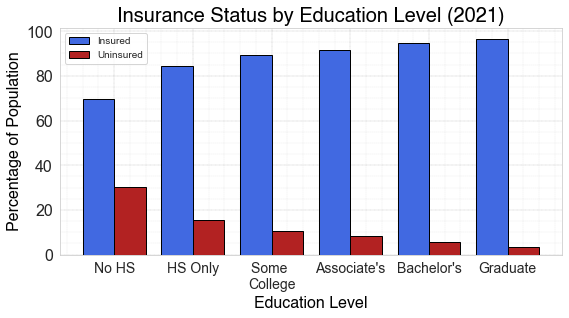

In [111]:
Insured_Educ = Insured[0:6]
Uninsured_Educ = Uninsured[0:6]

#Create Labels for the X-Axis
Education_Labels = ['No HS', 'HS Only', 'Some \nCollege', "Associate's", "Bachelor's", "Graduate"]

#Create Parameters for Double-Bar Plot
n = len(Insured_Educ)
r = np.arange(n)
width = 0.4

#Set Barplot Size
fig, ax = plt.subplots(figsize=(9,5))

#Set both of the bar plots
plt.bar(r, Insured_Educ, color = 'royalblue',
        width = width, edgecolor = 'black',
        label='Insured')
plt.bar(r + width, Uninsured_Educ, color = 'firebrick',
        width = width, edgecolor = 'black',
        label='Uninsured')

#Style Axis Labels
title_font = {'family':'helvetica','color':'black','size':20}
label_font = {'family':'helvetica','color':'black','size':16}

#Define Title
plt.title("Insurance Status by Education Level (2021)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Education Level", fontdict=label_font)
plt.ylabel("Percentage of Population", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
plt.autoscale(enable=True, axis='both', tight=None)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
plt.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
plt.tick_params(which='minor', bottom=False, left=False)

#Sets the Axis Ticks spacing, labels, and font sizes
plt.yticks(fontsize=16)
plt.xticks(r + width/2, Education_Labels, fontsize=14)

#Adds the Legend
plt.legend()

#Prevents the Cutting Off of the Label at the Bottom of the Graph
plt.subplots_adjust(bottom=0.25)

#Save graph
plt.savefig('Insurance_Status_By_Education_Barplot.png')

#Shows the Plot
plt.show()

# Compare Citizenship Status and Insurance Status in a Bar Plot

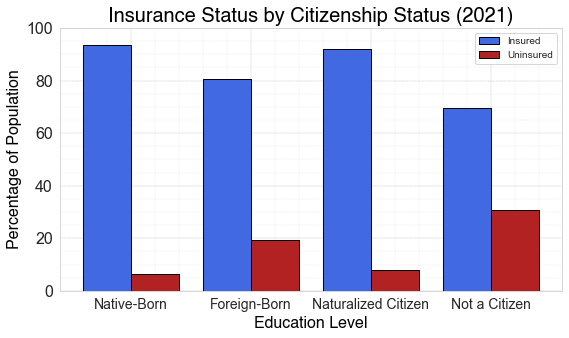

In [110]:
#Select Relevant Values from DataFrame
Insured_Cit = Insured[6:]
Uninsured_Cit = Uninsured[6:]

#Create Labels for the X-Axis
Citizen_Labels = ['Native-Born', 'Foreign-Born', 'Naturalized Citizen', 'Not a Citizen']

#Create Parameters for Double-Bar Plot
n = len(Insured_Cit)
r = np.arange(n)
width = 0.4

#Set Barplot Size
fig, ax = plt.subplots(figsize=(9,5))

#Set both of the bar plots
plt.bar(r, Insured_Cit, color = 'royalblue',
        width = width, edgecolor = 'black',
        label='Insured')
plt.bar(r + width, Uninsured_Cit, color = 'firebrick',
        width = width, edgecolor = 'black',
        label='Uninsured')

#Style Axis Labels
title_font = {'family':'helvetica','color':'black','size':20}
label_font = {'family':'helvetica','color':'black','size':16}
number_font = {'family':'helvetica','color':'black','size':20}

#Define Title
plt.title("Insurance Status by Citizenship Status (2021)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Education Level", fontdict=label_font)
plt.ylabel("Percentage of Population", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
plt.autoscale(enable=True, axis='both', tight=None)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
plt.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
plt.tick_params(which='minor', bottom=False, left=False)

#Fix to ensure that the Range Shows up to 100 on the Y-Axis labels instead of only 80
ax.set_ylim([0,100])

#Sets the Axis Ticks spacing, labels, and font sizes
plt.yticks(fontsize=16)
plt.xticks(r + width/2, Citizen_Labels, fontsize=14)

#Adds the Legend
plt.legend()

#Prevents the Cutting Off of the Label at the Bottom of the Graph
plt.subplots_adjust(bottom=0.15)

#Save graph
plt.savefig('Insurance_Status_By_Citizenship_Barplot.png')

#Shows the Plot
plt.show()